<a href="https://colab.research.google.com/github/Rairocha/brazilian_rent/blob/main/preco_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas


In [6]:
import pandas as pd
import seaborn as sns

# Leitura de dataframe

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Rairocha/brazilian_rent/main/houses_to_rent_v2.csv')

In [8]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [35]:
df_clean.corr()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.416607,0.430229,0.370991,0.088751,0.351416,0.319589,0.382932,0.345909
rooms,0.416607,1.000000,0.703502,0.575774,0.213306,0.507847,0.467049,0.539236,0.526564
bathroom,0.430229,0.703502,1.000000,0.645366,0.297196,0.612775,0.559787,0.629772,0.646923
parking spaces,0.370991,0.575774,0.645366,1.000000,0.174907,0.521250,0.479553,0.550929,0.526901
hoa (R$),0.088751,0.213306,0.297196,0.174907,1.000000,0.281179,0.432245,0.174428,0.583287
rent amount (R$),0.351416,0.507847,0.612775,0.521250,0.281179,1.000000,0.472310,0.979712,0.937111
property tax (R$),0.319589,0.467049,0.559787,0.479553,0.432245,0.472310,1.000000,0.461561,0.632122
fire insurance (R$),0.382932,0.539236,0.629772,0.550929,0.174428,0.979712,0.461561,1.000000,0.887305
total (R$),0.345909,0.526564,0.646923,0.526901,0.583287,0.937111,0.632122,0.887305,1.000000


# Limpeza de dados

In [19]:
df_clean = df[df['total (R$)']<10000]

In [54]:
df_clean = df_clean[df_clean['area']<1000]

# Graficos


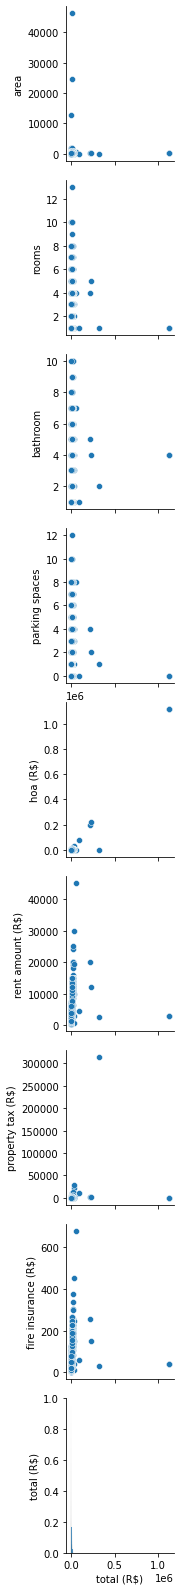

In [9]:
sns.pairplot(df,x_vars='total (R$)')

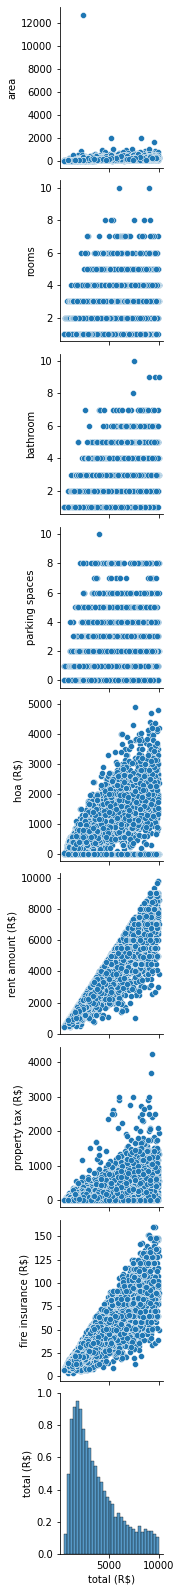

In [17]:
sns.pairplot(df[df['total (R$)']<10000],x_vars='total (R$)')

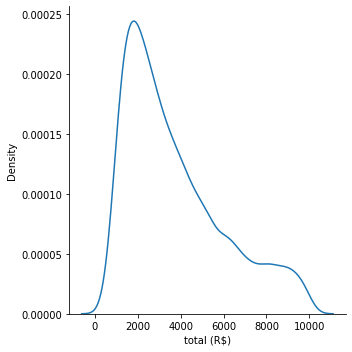

In [21]:
sns.displot(df_clean['total (R$)'],kind='kde')

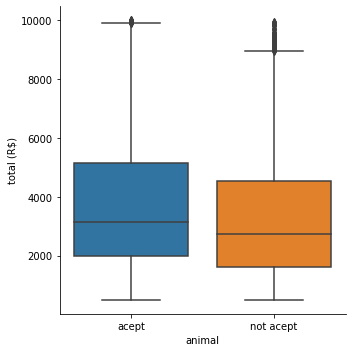

In [30]:
sns.catplot(x = 'animal',y= 'total (R$)',data = df_clean, kind='box')

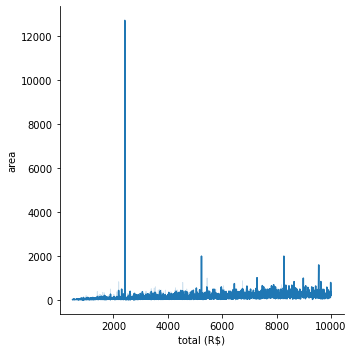

In [33]:
sns.relplot(x = 'total (R$)',y= 'area',data = df_clean, kind='line')

# Treinamento modelo

In [36]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [55]:
from sklearn.linear_model import LinearRegression
X=df_clean[['bathroom']]
y = df_clean['total (R$)']

model = LinearRegression()
model.fit(X,y)
X['price_predicted'] = model.predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Deploy

In [56]:
X.to_csv('previsao_v1.csv',index=False)

# previsao com banheiro, rmse 5000
# previsao com banheiro sem outliers, rmse 4000



In [57]:
from google.colab import files
files.download("previsao_v1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>